In [1]:
# Dogs vs. cats dataset with ConvNets
# download and unzip the dogs-vs-cats.zip into test directory

import os

cd = os.getcwd()
print("cd: ", cd)

base_dir = os.path.join(cd, 'test/dogs-vs-cats')

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

cd:  c:\nik\woodbury\S21-CSMA213\github\S21_CSMA.213\w12
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 47s 474ms/step - loss: 0.6901 - acc: 0.5360 - val_loss: 0.6720 - val_acc: 0.6070
Epoch 2/10
100/100 [==============================] - 40s 400ms/step - loss: 0.6581 - acc: 0.6270 - val_loss: 0.6454 - val_acc: 0.6270
Epoch 3/10
100/100 [==============================] - 41s 413ms/step - loss: 0.6237 - acc: 0.6495 - val_loss: 0.6355 - val_acc: 0.6320
Epoch 4/10
100/100 [==============================] - 45s 445ms/step - loss: 0.5767 - acc: 0.7075 - val_loss: 0.6826 - val_acc: 0.6230
Epoch 5/10
100/100 [==============================] - 44s 440ms/step - loss: 0.5313 - acc: 0.7370 - val_loss: 0.6799 - val_acc: 0.6230
Epoch 6/10
100/100 [==============================] - 44s 444ms/step - loss: 0.5044 - acc: 0.7640 - val_loss: 0.5803 - val_acc: 0.6930
Epoch 7/10
100/100 [==============================] - 43s 429ms/step - loss: 0.4751 - acc: 0.7755 - val_loss: 0.71

In [7]:
# (optional) save model:
model.save('cats-vs-dogs-model.h5')

# (optional) load model:
# from keras.models import load_model
# model = load_model('cats-vs-dogs-model.h5')

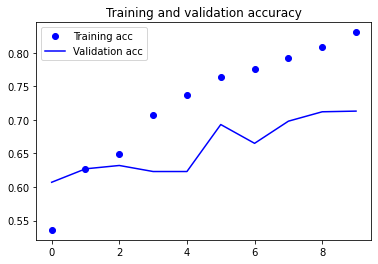

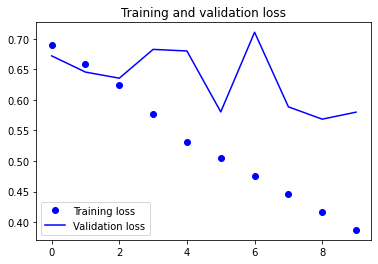

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

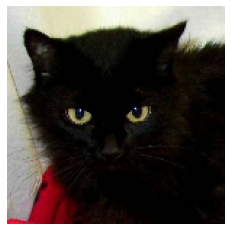

prediction:  [[0.02330092]]


In [9]:
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(test_cats_dir, 'cat.1500.jpg')
#img_path = os.path.join(test_dogs_dir, 'dog.1500.jpg')
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

# check prediction
pred = model.predict(img_tensor)
print("prediction: ", pred)